In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Загрузим датасет с машинами. Цель - верно восстанавливать для каждой из них цену продажи!

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/csv/autos.csv')

data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df = data.copy()

In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
a = data.groupby(by = "name").agg({
    "selling_price":"mean"
})

In [ ]:
a

,selling_price
name,
Ambassador CLASSIC 1500 DSL AC,120000.0
Ambassador Classic 2000 Dsz,50000.0
Ambassador Grand 1800 ISZ MPFI PW CL,430000.0
Audi A4 1.8 TFSI,1200000.0
Audi A4 2.0 TDI,1295000.0
...,...
Volkswagen Vento Petrol Highline AT,284500.0
Volvo V40 D3 R Design,1975000.0
Volvo XC 90 D5 Inscription BSIV,4500000.0


In [ ]:
df["name"].map(a["selling_price"])

0       9.434783e+04
1       1.444167e+05
2       4.906664e+05
3       2.299999e+05
4       5.305556e+05
            ...     
4335    3.709998e+05
4336    4.099990e+05
4337    8.900000e+04
4338    1.186667e+06
4339    2.783333e+05
Name: name, Length: 4340, dtype: float64

In [ ]:
### Колонка с тергетом - "selling price"

X = data.drop("selling_price", axis=1)
y = data["selling_price"]

### Будем замерять MSLE!
### Поэтому прологарифмируем таргет
### А после оптимизируем MSE

y = y.apply(np.log1p)

In [ ]:
max(y.values)

16.001561947061912

In [ ]:
### Разделим выборку на трейн и тест!

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

__Задание__ 

Реализуйте свой MeanTargetEncoder с добавленем некоторого шума!

Однажды в лекционном материале, обсуждая счетчики, мы говорили с вами о том, что из-за них модели могут переобучаться. Один из способов бороться с этим - валидировать расчеты среднего таргета (стратегия отложенной выборки / расчеты на кросс-валидации). Но есть еще проще!

Можно просто к значению счетчика добавить случайный шум (зашумить данные)!

Напомним, что рассчитываться новые признаки должны по такой формуле:

$$
g_j = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}{l} + C * \epsilon
$$


Пусть шум будет случайной величиной из нормального стандартного распределения, то есть $\epsilon \sim N(0, 1) $, а $ C = 0.006$.

Создавай свой класс-трансформер, наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`. Трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. 
Ваш трансформер должен принимать при инициализации список из категориальных признаков и список из числовых признаков. 

Если для какого-то признака в тестовой выборке отсутствует значение, трансформер должен поставить там 0.

На выходе должен получиться датасет того же размера с измененными категориальными признаками

In [ ]:
object_cols = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner']
num_cols = ['km_driven']

X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import itertools
class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric):
        self.categorical = categorical
        self.numeric = numeric
        
        ### Your code is here
    
    def fit(self, X, y):
        X_fit = X.copy()
        y_fit = y.copy()
        

        
        C = 0.006
        e = np.random.normal(0,1,1)
        
        
        X_with_target = pd.concat((X_fit, y_fit), axis=1)
        
       
        
        ### Посчитаем на валидации средние значения таргета
        self.dict_of_means = {col : ((X_with_target.groupby(by = col).agg({"selling_price" : "mean"}))+C*e)
                              for col in self.categorical}
        
        
        return self
        
    def transform(self, X):
        
        X_ = X.copy()
        
        
    
        for col in self.categorical:
                X_[col] = X_[col].map(self.dict_of_means[col]["selling_price"])
              

                X_[col] = X_[col].fillna(0)
                
            
        return X_[sorted(X_.columns)]

In [ ]:
X_train

,name,year,km_driven,fuel,seller_type,transmission,owner
3294,Maruti Swift Dzire AMT VDI,2018,50000,Diesel,Individual,Automatic,First Owner
2290,Honda City 1.5 V AT,2008,70000,Petrol,Individual,Automatic,First Owner
874,Maruti Alto 800 LXI,2017,50000,Petrol,Individual,Manual,First Owner
1907,Datsun GO T Petrol,2015,92198,Petrol,Dealer,Manual,Second Owner
3244,Hyundai EON Era Plus,2013,3240,Petrol,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...
2895,Maruti Zen Estilo LXI BSIII,2008,40000,Petrol,Individual,Manual,First Owner
2763,Hyundai Grand i10 1.2 Kappa Asta,2019,15000,Petrol,Individual,Manual,First Owner
905,Maruti Ertiga VXI,2015,11918,Petrol,Trustmark Dealer,Manual,First Owner
3980,Hyundai Creta 1.6 CRDi SX Option,2015,90000,Diesel,Individual,Manual,Second Owner


In [ ]:
### Проверка работы трансформера

np.random.seed(1)
transformer = MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)

transformer.fit(X_train, y_train)

train = transformer.transform(X_train)
test = transformer.transform(X_test)

train.head()

,fuel,km_driven,name,owner,seller_type,transmission,year
3294,13.098869,50000,13.478865,12.982681,12.627842,13.780997,13.449309
2290,12.463095,70000,12.125200,12.982681,12.627842,13.780997,11.919901
874,12.463095,50000,12.311508,12.982681,12.627842,12.647935,13.346474
1907,12.463095,92198,12.493842,12.469935,13.157065,12.647935,13.067094
3244,12.463095,3240,12.401697,12.469935,12.627842,12.647935,12.870501


Обучите несколько деревьев, перебирая максимальную глубину алгоритма из списка `max_depth_list`, а остальные параметры оставьте дефолтными. Выведите лучшее значение гиперпараметра. Постройте график зависимости MSLE на тестовой выборке от значения гиперпараметра. Воспользуйтесь `Pipeline` без `GridSearch`. Проделайте то же самое с `min_samples_split`, `min_impurity_decrease`, `max_leaf_nodes`. (по 2б на каждый параметр)

In [ ]:
max_depth_list = [3, 5, 8, 12]
min_samples_split_list = [10, 50, 100, 500]
min_impurity_decrease_list = [0, 0.1, 0.15, 0.2]
max_leaf_nodes_list = [100, 200, 500]

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

np.random.seed(1)

### Your code is here
a = {}
for i in max_depth_list:
  pipe = Pipeline([("Prepro",MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),("Tree",DecisionTreeRegressor(max_depth= i))])
  pipe.fit(X_train,y_train)

  a[i] = mse(y_test,pipe.predict(X_test))





In [ ]:
a

{3: 0.7968292144892007,
 5: 1.4418633938730099,
 8: 1.9886631454800547,
 12: 1.9839729904750691}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


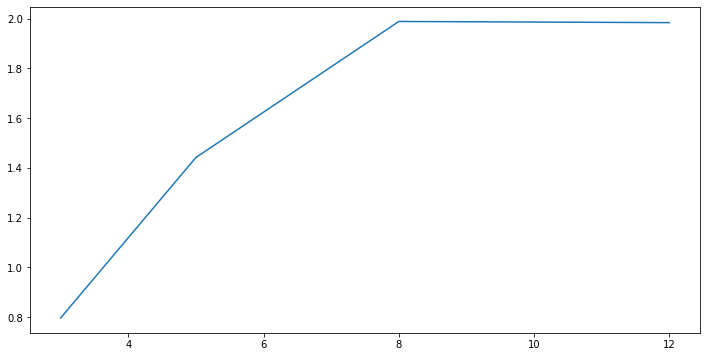

In [ ]:
fig = plt.figure()
fig.set_size_inches(12,6)
sns.lineplot(a.keys(),a.values())

In [ ]:
a = {}
for i in min_samples_split_list:
  pipe = Pipeline([("Prepro",MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),("Tree",DecisionTreeRegressor(min_samples_split= i))])
  pipe.fit(X_train,y_train)

  a[i] = mse(y_test,pipe.predict(X_test))


In [ ]:
a

{10: 1.4307346306687412,
 50: 1.4386960572382825,
 100: 0.9520426718791589,
 500: 0.8076747956646493}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


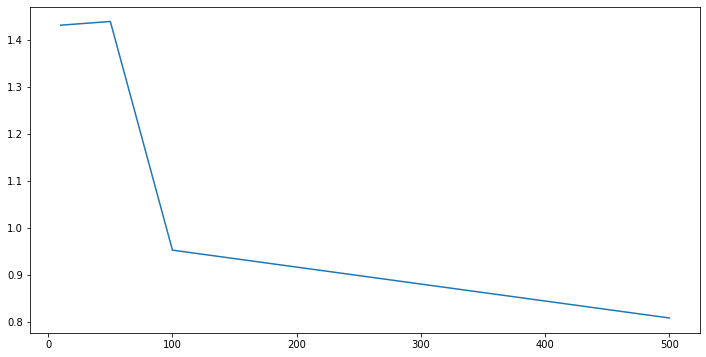

In [ ]:
fig = plt.figure()
fig.set_size_inches(12,6)
sns.lineplot(a.keys(),a.values())

In [ ]:
a = {}
for i in min_impurity_decrease_list:
  pipe = Pipeline([("Prepro",MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),("Tree",DecisionTreeRegressor(min_impurity_decrease= i))])
  pipe.fit(X_train,y_train)

  a[i] = mse(y_test,pipe.predict(X_test))

In [ ]:
a

{0: 1.9791768892459065,
 0.1: 0.5204871413036422,
 0.15: 0.5204871413036695,
 0.2: 0.5204871413036208}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


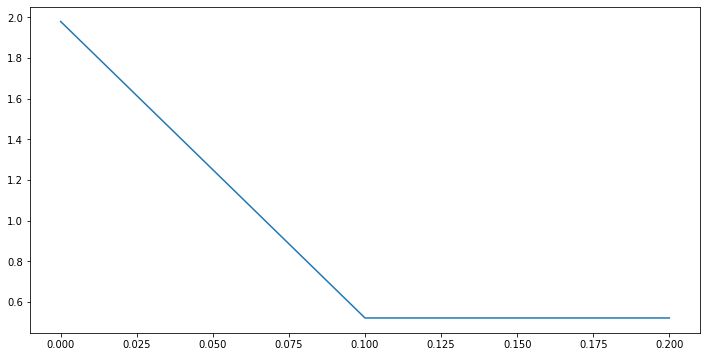

In [ ]:
fig = plt.figure()
fig.set_size_inches(12,6)
sns.lineplot(a.keys(),a.values())

In [ ]:
a = {}
for i in max_leaf_nodes_list:
  pipe = Pipeline([("Prepro",MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),("Tree",DecisionTreeRegressor(max_leaf_nodes = i))])
  pipe.fit(X_train,y_train)

  a[i] = mse(y_test,pipe.predict(X_test))

In [ ]:
a

{100: 1.9883090342277725, 200: 1.9839205320539333, 500: 1.9782943513264375}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


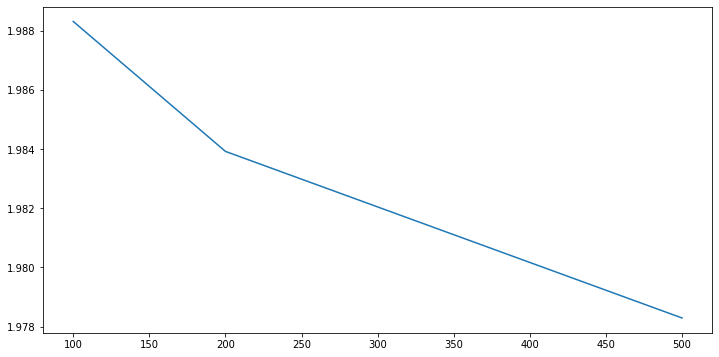

In [ ]:
fig = plt.figure()
fig.set_size_inches(12,6)
sns.lineplot(a.keys(),a.values())

Подберите лучшую комбинацию параметров, используя `GridSearchCV` и набор массивов значений параметров из предыдущего задания. Для лучшей комбинации посчитайте MSLE на тестовой выборке. Получились ли лучшие параметры такими же, как если бы вы подбирали их по-отдельности при остальных гиперпараметрах по умолчанию (предыдущее задание)? (2б)

In [ ]:
pipe = Pipeline([("Prepro",MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),("Tree",DecisionTreeRegressor())])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "Tree__max_depth": [3, 5, 8, 12],
    "Tree__min_samples_split": [10, 50, 100, 500],
    "Tree__min_impurity_decrease": [0, 0.1, 0.15, 0.2],
    "Tree__max_leaf_nodes": [100, 200, 500]

}
search = GridSearchCV(pipe, 
                      param_grid, 
                      scoring='neg_mean_squared_error',
                      verbose=10)





In [ ]:
search.fit(X_train,y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5; 1/192] START Tree__max_depth=3, Tree__max_leaf_nodes=100, Tree__min_impurity_decrease=0, Tree__min_samples_split=10
[CV 1/5; 1/192] END Tree__max_depth=3, Tree__max_leaf_nodes=100, Tree__min_impurity_decrease=0, Tree__min_samples_split=10;, score=-1.041 total time=   0.4s
[CV 2/5; 1/192] START Tree__max_depth=3, Tree__max_leaf_nodes=100, Tree__min_impurity_decrease=0, Tree__min_samples_split=10
[CV 2/5; 1/192] END Tree__max_depth=3, Tree__max_leaf_nodes=100, Tree__min_impurity_decrease=0, Tree__min_samples_split=10;, score=-0.827 total time=   0.1s
[CV 3/5; 1/192] START Tree__max_depth=3, Tree__max_leaf_nodes=100, Tree__min_impurity_decrease=0, Tree__min_samples_split=10
[CV 3/5; 1/192] END Tree__max_depth=3, Tree__max_leaf_nodes=100, Tree__min_impurity_decrease=0, Tree__min_samples_split=10;, score=-1.049 total time=   0.1s
[CV 4/5; 1/192] START Tree__max_depth=3, Tree__max_leaf_nodes=100, Tree__min_impurity_decre

GridSearchCV(estimator=Pipeline(steps=[('Prepro',
                                        MeanTargetEncoderNoise(categorical=['name',
                                                                            'year',
                                                                            'fuel',
                                                                            'seller_type',
                                                                            'transmission',
                                                                            'owner'],
                                                               numeric=['km_driven'])),
                                       ('Tree', DecisionTreeRegressor())]),
             param_grid={'Tree__max_depth': [3, 5, 8, 12],
                         'Tree__max_leaf_nodes': [100, 200, 500],
                         'Tree__min_impurity_decrease': [0, 0.1, 0.15, 0.2],
                         'Tree__min_samples_split': [10, 50, 10

In [ ]:
mse(y_test,search.predict(X_test))

0.5204871413036712

In [ ]:
print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

print(f"Качество лучшей модели на финальном тесте: {search.score(X_test, y_test)}")

Best parameter (CV score=-0.57274):
{'Tree__max_depth': 5, 'Tree__max_leaf_nodes': 100, 'Tree__min_impurity_decrease': 0.1, 'Tree__min_samples_split': 10}
Качество лучшей модели на финальном тесте: -0.5204871413036712
